## Read in data from csv file 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv('data/2019-10-18-DC.csv', index_col=False, na_values=[99999])

print('Number cand_id:',len(df['cand_id'].unique()))
print('Number cmte_id:', len(df['cmte_id'].unique()))
print('Number cand_nm:', len(df['cand_nm'].unique()))
print('df.shape:', df.shape)

Number cand_id: 28
Number cmte_id: 28
Number cand_nm: 28
df.shape: (19875, 18)


In [12]:
len(df.contbr_zip[27].astype(str))

3

In [13]:
df.cand_nm.unique()

array(['Trump, Donald J.', 'Delaney, John K.', 'Sanders, Bernard',
       'Yang, Andrew', 'Harris, Kamala D.', 'Inslee, Jay R',
       'Weld, William Floyd (Bill)', 'Hickenlooper, John W.',
       'Booker, Cory A.', 'Moulton, Seth', 'Buttigieg, Pete',
       'Gabbard, Tulsi', 'Warren, Elizabeth ', 'Klobuchar, Amy J.',
       'Biden, Joseph R Jr', 'Williamson, Marianne ',
       'Gillibrand, Kirsten ', 'Bennet, Michael F.',
       'O’Rourke, Robert Beto', 'Bullock, Steve', 'Castro, Julián',
       'Ryan, Timothy J.', 'de Blasio, Bill', 'Steyer, Tom',
       'Gravel, Maurice Robert', 'Sestak, Joseph A. Jr.', 'Walsh, Joe',
       'Swalwell, Eric Michael'], dtype=object)

In [14]:
df.isna().sum()

cmte_id                  0
cand_id                  0
cand_nm                  0
contbr_nm                0
contbr_city              1
contbr_st                0
contbr_zip              15
contbr_employer        799
contbr_occupation      334
contb_receipt_amt        0
contb_receipt_dt         0
receipt_desc         19548
memo_cd              18243
memo_text             4406
form_tp                  0
file_num                 0
tran_id                  0
election_tp              5
dtype: int64

In [15]:
df.contbr_occupation.value_counts();

In [16]:
df.contbr_city.value_counts();

In [17]:
cand_list = ['Warren, Elizabeth ', 'Trump, Donald J.', 'Sanders, Bernard', 'Buttigieg, Pete', 'Biden, Joseph R Jr']
df_top = df.loc[df.cand_nm.isin(cand_list)]
df_top = df_top.drop(['file_num', 'memo_cd', 'receipt_desc', 'contbr_st', 'memo_text','cmte_id'], axis=1)
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13138 entries, 0 to 19718
Data columns (total 12 columns):
cand_id              13138 non-null object
cand_nm              13138 non-null object
contbr_nm            13138 non-null object
contbr_city          13138 non-null object
contbr_zip           13125 non-null float64
contbr_employer      12868 non-null object
contbr_occupation    12919 non-null object
contb_receipt_amt    13138 non-null float64
contb_receipt_dt     13138 non-null object
form_tp              13138 non-null object
tran_id              13138 non-null object
election_tp          13136 non-null object
dtypes: float64(2), object(10)
memory usage: 1.3+ MB


In [18]:
df_top['contb_receipt_dt'] = pd.to_datetime(df_top.contb_receipt_dt)
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13138 entries, 0 to 19718
Data columns (total 12 columns):
cand_id              13138 non-null object
cand_nm              13138 non-null object
contbr_nm            13138 non-null object
contbr_city          13138 non-null object
contbr_zip           13125 non-null float64
contbr_employer      12868 non-null object
contbr_occupation    12919 non-null object
contb_receipt_amt    13138 non-null float64
contb_receipt_dt     13138 non-null datetime64[ns]
form_tp              13138 non-null object
tran_id              13138 non-null object
election_tp          13136 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 1.3+ MB


In [19]:
df_form = df_top.groupby(['cand_nm','form_tp']).sum()
df_form

contbr_zip  contb_receipt_amt
cand_nm            form_tp                                 
Biden, Joseph R Jr SA17A    2.775626e+11          684116.96
                   SB28A    1.220544e+10          -43038.29
Buttigieg, Pete    SA17A    7.505604e+11         1224617.37
                   SB28A    1.760650e+10          -57738.00
Sanders, Bernard   SA17A    5.343232e+11          170034.87
                   SB28A    7.602547e+09           -7206.99
Trump, Donald J.   SA17A    6.332389e+06           87658.76
                   SA18     1.804337e+07          176027.68
Warren, Elizabeth  SA17A    7.247363e+11          370439.86
                   SB28A    3.601755e+09           -5227.24

In [20]:
df_top.contbr_zip.isna().sum()
df_top.loc[df_top.contbr_zip.isna()]

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
27,P80001571,"Trump, Donald J.","RICHARDS, MARK",GEORGETOWN,NaN,INFORMATION REQUESTED,INFORMATION REQUESTED,121.7,2016-11-18,SA18,SA18.346311,G2016
2542,P80000722,"Biden, Joseph R Jr","THOMPSON, KENNETH D JR",WASHINGTON,NaN,PEPSICO,SENIOR DIRECTOR GOVERNMENT & EXTERNAL,500.0,2019-05-24,SA17A,726690,P2020
2543,P80000722,"Biden, Joseph R Jr","THOMPSON, KENNETH D JR",WASHINGTON,NaN,PEPSICO,SENIOR DIRECTOR GOVERNMENT & EXTERNAL,2000.0,2019-05-30,SA17A,744390,P2020
2544,P80000722,"Biden, Joseph R Jr","THOMPSON, KENNETH D JR",WASHINGTON,NaN,PEPSICO,SENIOR DIRECTOR GOVERNMENT & EXTERNAL,125.0,2019-06-11,SA17A,786941,P2020
12549,P80001571,"Trump, Donald J.","MANYOK, PAUL",WASHINGTON D.C.,NaN,CORE CEVIC,CAPTAIN,28.0,2016-12-10,SA18,SA18.296633,P2020
12602,P80001571,"Trump, Donald J.","SHEPARDSON, DONALDA",ALPINE,NaN,SELF-EMPLOYED,EXEC. VP SHEPARDSON ENGINEERING,200.0,2017-01-20,SA18,SA18.419095,P2020
12716,P80001571,"Trump, Donald J.","RICHARDS, MARK",GEORGETOWN,NaN,INFORMATION REQUESTED,INFORMATION REQUESTED,121.7,2017-01-20,SA18,SA18.405775,P2020
16149,P80001571,"Trump, Donald J.","SHEPARDSON, DONALDA",ALPINE,NaN,SELF-EMPLOYED,EXEC. VP SHEPARDSON ENGINEERING,200.0,2017-01-29,SA18,SA18.22787,P2020
16202,P80001571,"Trump, Donald J.","BARRINGTON-SMITH, RICHARD",CANBERRA,NaN,RETIRED,RETIRED,28.0,2016-12-08,SA18,SA18.299454,P2020
16218,P80001571,"Trump, Donald J.","RICHARD, BECKLER",DC,NaN,BRACEWELL,ATTORNEY,80.0,2016-12-07,SA18,SA18.251133,P2020


In [21]:
# clean zip codes to five digits 
df_top['contbr_zip'] = df_top.contbr_zip.astype('str')
df_top.contbr_zip = df_top.contbr_zip.apply(lambda x: x[0:5])

In [22]:
# check which candidates have the instances of SB28A (refunds)
# Buttigieg (88), Biden (62), Sanders (38), Warren (18)
df_top.loc[df_top.form_tp == 'SB28A'].groupby('cand_nm').count()

,cand_id,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
cand_nm,,,,,,,,,,,
"Biden, Joseph R Jr",62,62,62,62,0,0,62,62,62,62,60
"Buttigieg, Pete",88,88,88,88,0,0,88,88,88,88,88
"Sanders, Bernard",38,38,38,38,0,0,38,38,38,38,38
"Warren, Elizabeth",18,18,18,18,0,0,18,18,18,18,18


In [23]:
# drop the refunds SB28A 
df_top = df_top[df_top.form_tp != 'SB28A']
df_top.form_tp.value_counts()

SA17A    12029
SA18       903
Name: form_tp, dtype: int64

In [24]:
# replace nan contbr zip for Kenneth Thompson with 20001
df_top.loc[(df_top.cand_nm == 'Biden, Joseph R Jr' ) & (df_top.contbr_employer == 'PEPSICO')]
df_top.contbr_zip.fillna('20001') 
print(df_top.contbr_zip.isna().sum())

0


In [25]:
# check other null values 
df_top.loc[df_top.contbr_employer.isna()].head()
df_top.loc[df_top.contbr_occupation.isna()].head()

# drop all contributions from committees 
df_SA17A = df_top[df_top.form_tp != 'SA18']


In [26]:
df_SA17A.loc[df_SA17A.contbr_employer.isna()]

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
4551,P00009621,"Warren, Elizabeth","DEMOCRACY ENGINE, INC., PAC",WASHINGTON,20001,NaN,CONDUIT TOTAL LISTED IN AGG. FIELD,5.00,2019-08-28,SA17A,4017578E,P2020
4935,P00009621,"Warren, Elizabeth","DEMOCRACY ENGINE, INC., PAC",WASHINGTON,20001,NaN,CONDUIT TOTAL LISTED IN AGG. FIELD,1000.00,2019-09-30,SA17A,4497786E,P2020
5292,P00009621,"Warren, Elizabeth","DEMOCRACY ENGINE, INC., PAC",WASHINGTON,20001,NaN,CONDUIT TOTAL LISTED IN AGG. FIELD,250.00,2019-08-15,SA17A,4017590E,P2020
5749,P00009621,"Warren, Elizabeth","DEMOCRACY ENGINE, INC., PAC",WASHINGTON,20001,NaN,CONDUIT TOTAL LISTED IN AGG. FIELD,100.00,2019-07-29,SA17A,3830943E,P2020
5750,P00009621,"Warren, Elizabeth","DEMOCRACY ENGINE, INC., PAC",WASHINGTON,20001,NaN,CONDUIT TOTAL LISTED IN AGG. FIELD,100.00,2019-09-03,SA17A,4343661E,P2020
5751,P00009621,"Warren, Elizabeth","DEMOCRACY ENGINE, INC., PAC",WASHINGTON,20001,NaN,CONDUIT TOTAL LISTED IN AGG. FIELD,100.00,2019-09-25,SA17A,4343671E,P2020
5841,P00009621,"Warren, Elizabeth","DEMOCRACY ENGINE, INC., PAC",WASHINGTON,20001,NaN,CONDUIT TOTAL LISTED IN AGG. FIELD,50.00,2019-08-07,SA17A,4017589E,P2020
6569,P00009621,"Warren, Elizabeth","DEMOCRACY ENGINE, INC., PAC",WASHINGTON,20001,NaN,CONDUIT TOTAL LISTED IN AGG. FIELD,500.00,2019-07-29,SA17A,3830942E,P2020
6571,P00009621,"Warren, Elizabeth","DEMOCRACY ENGINE, INC., PAC",WASHINGTON,20001,NaN,CONDUIT TOTAL LISTED IN AGG. FIELD,500.00,2019-08-21,SA17A,4017591E,P2020
6573,P00009621,"Warren, Elizabeth","DEMOCRACY ENGINE, INC., PAC",WASHINGTON,20001,NaN,CONDUIT TOTAL LISTED IN AGG. FIELD,500.00,2019-09-19,SA17A,4343662E,P2020


In [27]:
df_SA17A.contbr_employer.fillna('none-listed', inplace=True)
df_SA17A.contbr_occupation.fillna('none-listed', inplace=True)

/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
df_SA17A.isna().sum()

cand_id              0
cand_nm              0
contbr_nm            0
contbr_city          0
contbr_zip           0
contbr_employer      0
contbr_occupation    0
contb_receipt_amt    0
contb_receipt_dt     0
form_tp              0
tran_id              0
election_tp          0
dtype: int64

In [29]:
df_SA17A.groupby('cand_nm').mean()

,contb_receipt_amt
cand_nm,
"Biden, Joseph R Jr",476.404568
"Buttigieg, Pete",320.245128
"Sanders, Bernard",60.082993
"Trump, Donald J.",276.526057
"Warren, Elizabeth",102.274948


In [30]:
df_SA17A.groupby('cand_nm').describe()

contb_receipt_amt                                         \
                               count        mean          std     min   25%   
cand_nm                                                                       
Biden, Joseph R Jr            1436.0  476.404568   906.407594 -2800.0  25.0   
Buttigieg, Pete               3824.0  320.245128   678.006041 -2800.0  25.0   
Sanders, Bernard              2830.0   60.082993   165.007852  -100.0   9.0   
Trump, Donald J.               317.0  276.526057  2398.522226 -2700.0  25.0   
Warren, Elizabeth             3622.0  102.274948   229.221795     1.0  25.0   

                                            
                      50%    75%       max  
cand_nm                                     
Biden, Joseph R Jr  100.0  500.0  15000.00  
Buttigieg, Pete     100.0  250.0   5600.00  
Sanders, Bernard     27.0   50.0   2719.00  
Trump, Donald J.     35.0  100.0  41800.72  
Warren, Elizabeth    50.0  100.0   2800.00

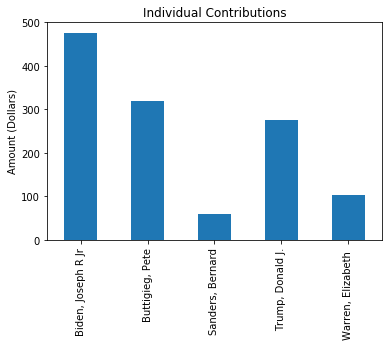

In [31]:
ax2 = df_SA17A.groupby('cand_nm').mean().plot.bar()
ax2.set(ylabel='Amount (Dollars)',xlabel='', title='Individual Contributions')
ax2.get_legend().remove()


In [32]:
# change bolling afb to washington and washingt to washington 
df_SA17A.contbr_city.value_counts()
ind_err = df_SA17A.loc[(df_SA17A.contbr_city == 'WASHINGT') |(df_SA17A.contbr_city == 'BOLLING AFB')].index
for ind in list(ind_err):
    print(df_SA17A.contbr_city[ind])
    df_SA17A.contbr_city[ind] = 'WASHINGTON'    
    print(df_SA17A.contbr_city[ind])
df_SA17A.contbr_city.value_counts()

# both are in Delaware 
df_SA17A.loc[df_SA17A.contbr_city == 'GREENVILLE']
df_SA17A.loc[df_SA17A.contbr_city == 'BEAR']


BOLLING AFB
WASHINGTON
BOLLING AFB
WASHINGTON
BOLLING AFB


/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


WASHINGTON
BOLLING AFB
WASHINGTON
BOLLING AFB
WASHINGTON
BOLLING AFB
WASHINGTON
BOLLING AFB
WASHINGTON
BOLLING AFB
WASHINGTON
BOLLING AFB
WASHINGTON
BOLLING AFB
WASHINGTON
BOLLING AFB
WASHINGTON
WASHINGT
WASHINGTON


,cand_id,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
80,P80001571,"Trump, Donald J.","KELLER, JUDITH",BEAR,19701,RETIRED,RETIRED,35.0,2018-01-19,SA17A,SA17A.1073175,P2020
95,P80001571,"Trump, Donald J.","KELLER, JUDITH",BEAR,19701,RETIRED,RETIRED,35.0,2018-03-19,SA17A,SA17A.1098054,P2020
12634,P80001571,"Trump, Donald J.","KELLER, JUDITH",BEAR,19701,RETIRED,RETIRED,35.0,2018-02-19,SA17A,SA17A.1091397,P2020
16156,P80001571,"Trump, Donald J.","KELLER, JUDITH",BEAR,19701,RETIRED,RETIRED,35.0,2018-05-19,SA17A,SA17A.1251164,P2020
16312,P80001571,"Trump, Donald J.","KELLER, JUDITH",BEAR,19701,RETIRED,RETIRED,35.0,2018-04-19,SA17A,SA17A.1251163,P2020


In [33]:
df_SA17A.contbr_city.value_counts()


WASHINGTON    12023
BEAR              5
GREENVILLE        1
Name: contbr_city, dtype: int64

In [34]:
# remove delaware cities 
df_SA17A = df_SA17A.query('contbr_city == "WASHINGTON"')

In [35]:
df_SA17A.contbr_zip.unique()

array(['20008', '20007', '20037', '20003', '20016', '20001', '20009',
       '20006', '20013', '20018', '20010', '20002', '20024', '20011',
       '20005', '20015', '20012', '20552', '20212', '20004', '20036',
       '20019', '20526', '20017', '20301', '20540', '20032', 'nan',
       '20020', '22205', '25413', '20585', '20057', '20375', '20472',
       '20270', '20026', '20229', '20420', '20591', '20500', '20210',
       '20038', '20044', '10036', '20014', '20027', '20577', '11217',
       '20052', '20035'], dtype=object)

In [45]:
df_SA17A.loc[(df_SA17A.contbr_zip == "nan"), 'contbr_zip'] = '20001'
df_SA17A.contbr_zip.isna().sum()
df_SA17A.contbr_zip.unique()
df_SA17A = df_SA17A.query('(contbr_zip != "10036") & (contbr_zip != "11217")')

In [46]:
df_SA17A.loc[df_SA17A.contb_receipt_amt > 2800]
#df_SA17A.loc[df_SA17A.contbr_nm == 'DIXON, KAREN']
#df_SA17A.loc[df_SA17A.contbr_nm == 'CHAPMAN, HILARY']
df_SA17A.groupby(df_SA17A.contbr_nm).sum().head()
df_SA17A = df_SA17A.drop('cand_id', axis=1)
df_SA17A.head()

,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.","NICHOLS, ROBERT",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.","KNIGHT, SHAREN",WASHINGTON,20037,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020
41,"Trump, Donald J.","MOCEK, GREGORY",WASHINGTON,20007,CADWALADER,ATTORNEY,-2700.0,2017-01-20,SA17A,SA17A.445455,G2016


In [47]:
# tran_id is not a unique value 
df_SA17A[df_SA17A.duplicated(subset = 'tran_id', keep=False)]

,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
2620,"Biden, Joseph R Jr","SPALDING, PETER",WASHINGTON,20007,NOT EMPLOYED,NOT EMPLOYED,100.0,2019-05-16,SA17A,680256,P2020
8044,"Buttigieg, Pete","MISHORI, RANIT",WASHINGTON,20007,GEORGETOWN UNIVERSITY,PHYSICIAN,250.0,2019-07-20,SA17A,1161928,P2020
8193,"Buttigieg, Pete","LEO, JENNIFER",WASHINGTON,20005,PHONE2ACTION,CHIEF OF STAFF,1000.0,2019-07-23,SA17A,1168851,P2020
8870,"Buttigieg, Pete","SKLAROFF, SARA",WASHINGTON,20007,O2 LAB,DESIGNER,500.0,2019-07-13,SA17A,1125687,P2020
11168,"Biden, Joseph R Jr","BATIPPS, MICHAEL",WASHINGTON,20010,NDA,HEALTH CARE,50.0,2019-09-21,SA17A,1168851,P2020
12142,"Biden, Joseph R Jr","NUSSBAUM, MATTHEW",WASHINGTON,20036,NOT EMPLOYED,NOT EMPLOYED,10.0,2019-09-20,SA17A,1161928,P2020
12157,"Biden, Joseph R Jr","HOLLAN, LOIS",WASHINGTON,20007,SELF,PROGRAM MANAGER,10.0,2019-08-02,SA17A,1001157,P2020
12164,"Biden, Joseph R Jr","GOLDEN, KATHLEEN",WASHINGTON,20015,SELF-EMPLOYED,CONSULTANT,1000.0,2019-09-09,SA17A,1125687,P2020
14222,"Biden, Joseph R Jr","CUPITT, RICHARD",WASHINGTON,20002,STIMSON CENTER,RESEARCHER,100.0,2019-06-22,SA17A,832635,P2020
18874,"Buttigieg, Pete","GILFOYLE, NATHALIE",WASHINGTON,20015,SELF-EMPLOYED,LAWYER,1000.0,2019-05-15,SA17A,832635,P2020


In [48]:
# df_SA17A.groupby('contbr_occupation')

In [53]:
df_SA17A = df_SA17A.drop('contbr_nm',axis=1)

In [54]:
df_SA17A.to_csv('SA17A-contr.csv')
df_SA17A.contbr_city.value_counts()
df_SA17A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12021 entries, 0 to 19718
Data columns (total 10 columns):
cand_nm              12021 non-null object
contbr_city          12021 non-null object
contbr_zip           12021 non-null object
contbr_employer      12021 non-null object
contbr_occupation    12021 non-null object
contb_receipt_amt    12021 non-null float64
contb_receipt_dt     12021 non-null datetime64[ns]
form_tp              12021 non-null object
tran_id              12021 non-null object
election_tp          12021 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
# df_clean.contbr_occupation.isna().sum()

In [ ]:
# # standardize occupation function
# def std_occ(title):        
#     title = title.strip()
#     title = title.lower()
#     if ('lawyer' or 'attorney' or 'counsel' or 'judge' or 'law') in title:
#         title = 'attorney'
#         return title
#     elif ('federal' or 'government' or 'gov' or 'fed') in title: 
#         title = 'government'
#         return title
#     elif ('school' or 'teacher' or 'education' or 'professor') in title:
#         title = 'education'
#         return title
#     elif ('physician' or 'doc') in title:
#         title = 'doctor'
#         return title
#     else: 
#         return title
        
# df_clean.contbr_occupation = df_clean.contbr_occupation.apply(lambda x: std_occ(x))
# df_clean.contbr_occupation.value_counts()

In [ ]:
std_occ('cat lawyer')